In [7]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 1.9 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
from google.colab import drive
import nlpaug.augmenter.audio as naa
import matplotlib.pyplot as plt
import librosa.display

In [56]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/Techolution/Trigger Words/door_open/62ac67bc1d1f194164a3badf.wav')

In [185]:
import librosa
signal, sample_rate = librosa.load('/content/drive/MyDrive/Techolution/Trigger Words/door_open/62ac67bc1d1f194164a3badf.wav',sr = None)
# sr = None makes sure the native sample rate of audio is used.

In [186]:
signal

array([0.01885986, 0.01980591, 0.02706909, ..., 0.00360107, 0.00289917,
       0.00869751], dtype=float32)

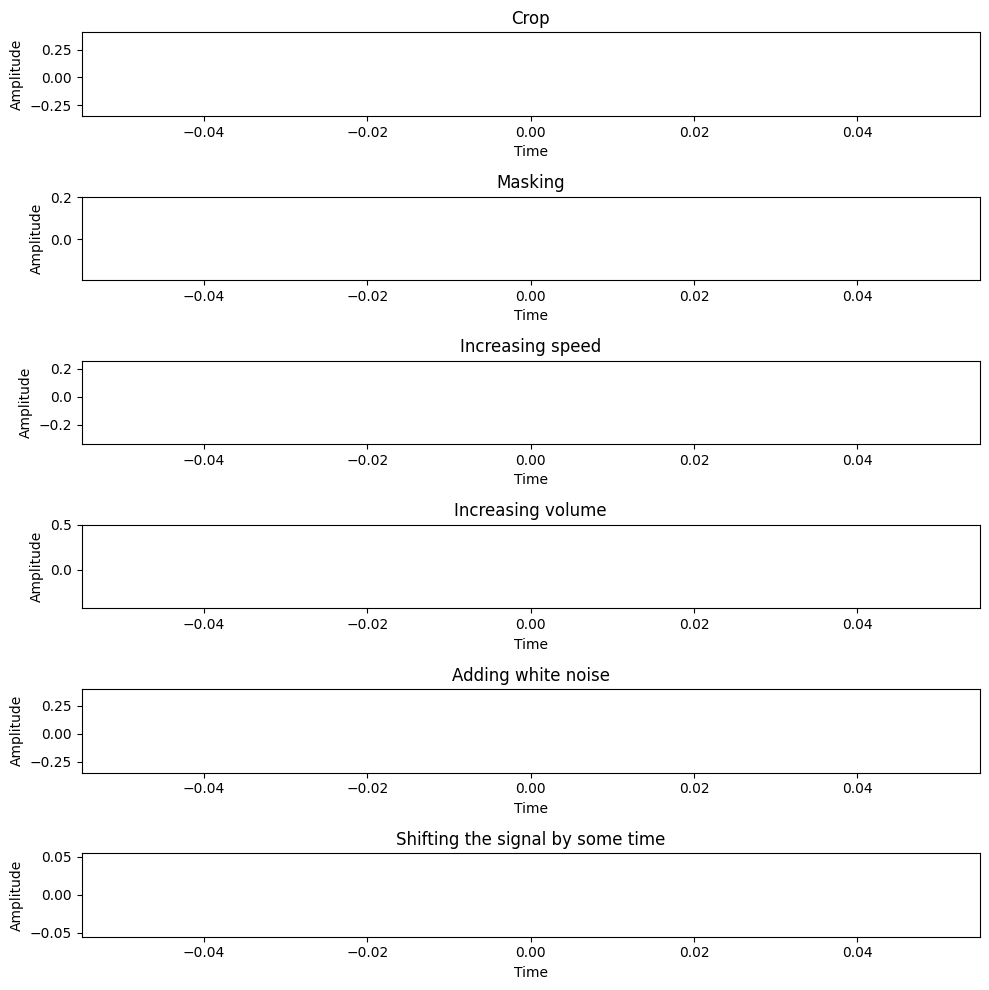

In [13]:
plt.figure(figsize=(10, 10))

plt.subplot(6, 1, 1)
plt.title("Crop")
plt.plot(naa.CropAug(sampling_rate=sample_rate).augment(signal))
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(6, 1, 2)
plt.title("Masking")
plt.plot(naa.MaskAug(sampling_rate=sample_rate, mask_with_noise=False).augment(signal))
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(6, 1, 3)
plt.title("Increasing speed")
plt.plot(naa.SpeedAug().augment(signal))
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(6, 1, 4)
plt.title("Increasing volume")
plt.plot(naa.LoudnessAug().augment(signal))
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(6, 1, 5)
plt.title("Adding white noise")
plt.plot(naa.NoiseAug().augment(signal))
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(6, 1, 6)
plt.title("Shifting the signal by some time")
plt.plot(naa.ShiftAug(sampling_rate=sample_rate).augment(signal))
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [16]:
signal

array([0.01885986, 0.01980591, 0.02706909, ..., 0.00360107, 0.00289917,
       0.00869751], dtype=float32)

In [15]:
naa.ShiftAug(sampling_rate=sample_rate).augment(signal)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

<ipython-input-20-577119ab1938>:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(signal, sr=sample_rate, x_axis='time')


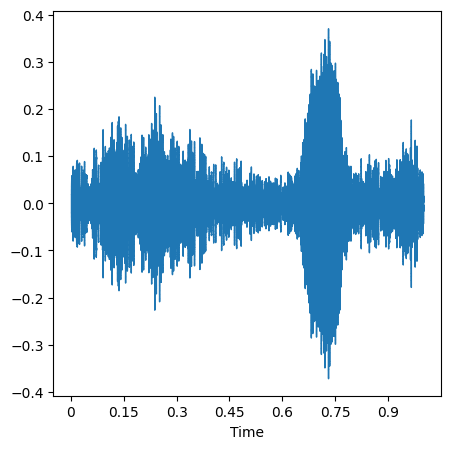

In [20]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
librosa.display.waveshow(signal, sr=sample_rate, x_axis='time')
plt.show()

In [21]:
# Applying Fourier Transform
signal, sample_rate = librosa.load('/content/drive/MyDrive/Techolution/Trigger Words/door_open/62ac67bc1d1f194164a3badf.wav',sr = None)
print(librosa.stft(signal))

[[ 8.4419072e-01+0.00000000e+00j  4.9787277e-01+0.00000000e+00j
   1.8362026e-01+0.00000000e+00j ...  3.4720540e-01+0.00000000e+00j
  -2.5526384e-01+0.00000000e+00j -5.3482175e-02+0.00000000e+00j]
 [-1.0187508e+00-3.85738283e-01j  7.2284408e-02+8.43205675e-02j
  -1.3571271e-01-3.59502614e-01j ... -3.5777691e-01-6.32657349e-01j
   3.7153244e-01+3.68917398e-02j  6.7187242e-02+1.96291611e-01j]
 [ 1.4304296e+00+4.50054437e-01j -1.3190069e+00-1.15301478e+00j
  -1.5528987e-01+1.78143597e+00j ...  4.9615023e-01+1.28273320e+00j
   1.9770476e-01-6.98979437e-01j -4.4634688e-01-2.03222498e-01j]
 ...
 [ 1.0825953e-02-1.81665812e-02j -1.8575748e-02+2.32941713e-02j
   1.6341284e-02+9.64278542e-03j ... -1.2688010e-02+1.57550294e-02j
  -1.2749966e-03+8.33416916e-03j  1.6810693e-04-8.14737193e-03j]
 [ 1.4043634e-03+1.12227323e-02j  7.7969348e-03-2.66380180e-02j
  -4.7282081e-02-1.36678275e-02j ...  2.7692853e-02+3.29927052e-03j
   4.6663098e-03-1.18490411e-02j  6.3963694e-04+1.15569588e-03j]
 [-4.03114

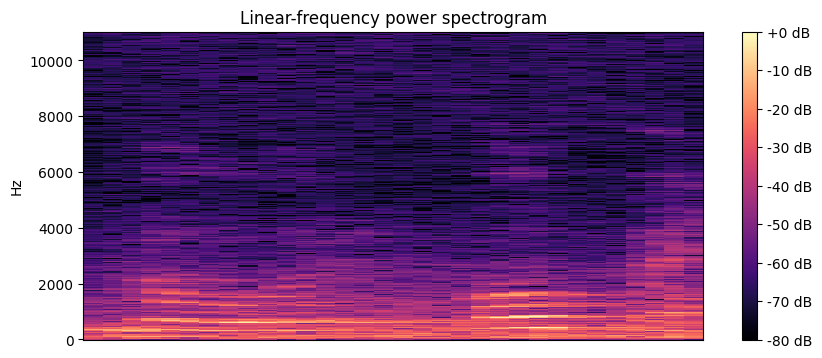

In [22]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
# amplitude_to_db converts an amplitude spectrogram to dB-scaled spectrogram
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

Mel-Frequency Cepstral Coefficients(MFCC)
MFCC acts as a Music Information Retreival method. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre. We get a set of 20 features that encapsulate all the information inside the audio signal. That’s pretty awesome. Feed these input features(along with labels) to any machine learning model focusing on classification, including your own Artificial Neural Network(that is if you have enough audio clips to exploit this!).

In [439]:
import librosa
import os
import librosa
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import warnings
#import skfuzzy as fuzz
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error, f1_score,r2_score, silhouette_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB  # As we have discrete y
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.manifold import TSNE

In [512]:
def mfcc_features(signal, sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T, axis=0).tolist()

def compute_zero_crossing_rate(audio):
    return librosa.feature.zero_crossing_rate(audio)[0]

def compute_spectral_centroid(audio, sample_rate):
    # Compute the spectrogram
    spectrogram = np.abs(librosa.stft(audio))

    # Compute the spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(S=spectrogram, sr=sample_rate)[0]

    return spectral_centroid

def compute_rms_energy(audio):
    # Compute the root mean square (RMS) energy
    rms_energy = librosa.feature.rms(y=audio)[0]

    return rms_energy



mfcc = []
czcr = []
csc = []
rms_energy = []
labels = []
filenames = []
folder_name = 'door_close'
folder_path = f'/content/drive/MyDrive/Techolution/Trigger Words/{folder_name}/'

# Iterate through all files in the folder
count = 0
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(folder_path, filename)
        filenames.append(filename)
        # Load audio file
        signal, sample_rate = librosa.load(file_path, sr=None)

        # Extract MFCC features and append to lists
        mfcc.append(mfcc_features(signal, sample_rate))
        czcr.append(compute_zero_crossing_rate(signal))
        csc.append(compute_spectral_centroid(signal, sample_rate))
        rms_energy.append(compute_rms_energy(signal))
        labels.append(folder_name)
        count = count + 1
        print(count)

# Convert lists to numpy arrays for further processing
mfcc = np.array(mfcc)
czcr = np.array(czcr)
csc = np.array(csc)
rms_energy = np.array(rms_energy)
labels = np.array(labels)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [517]:
print(len(labels))
print(labels)
df = pd.DataFrame()
df['filenames'] = filenames
df['MFCC Feature'] = list(mfcc)
df['Zero crossing Rate Feature'] = list(czcr)
df['Spectral Centroid'] = list(csc)
df['rms_energy'] = list(rms_energy)
df['labels'] = labels

df['MFCC Feature'] = df['MFCC Feature'].apply(lambda x: x.tolist())
df['Zero crossing Rate Feature'] = df['Zero crossing Rate Feature'].apply(lambda x: x.tolist())
df['Spectral Centroid'] = df['Spectral Centroid'].apply(lambda x: x.tolist())
df['rms_energy'] = df['rms_energy'].apply(lambda x: x.tolist())

# Split the 'MFCC Feature' column into 20 separate columns
df_split = pd.DataFrame(df['MFCC Feature'].apply(pd.Series))
# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)
# Drop the original 'MFCC Feature' column if needed
df = df.drop('MFCC Feature', axis=1)


# Split the 'MFCC Feature' column into 20 separate columns
df_split = pd.DataFrame(df['Zero crossing Rate Feature'].apply(pd.Series))
# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)
# Drop the original 'MFCC Feature' column if needed
df = df.drop('Zero crossing Rate Feature', axis=1)


# Split the 'MFCC Feature' column into 20 separate columns
df_split = pd.DataFrame(df['Spectral Centroid'].apply(pd.Series))
# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)
# Drop the original 'MFCC Feature' column if needed
df = df.drop('Spectral Centroid', axis=1)

# Split the 'MFCC Feature' column into 20 separate columns
df_split = pd.DataFrame(df['rms_energy'].apply(pd.Series))
# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)
# Drop the original 'MFCC Feature' column if needed
df = df.drop('rms_energy', axis=1)


3503
['door_close' 'door_close' 'door_close' ... 'door_close' 'door_close'
 'door_close']


In [518]:
df.shape

(3503, 138)

In [519]:
df.head(10)

,filenames,labels,0,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,6350ec69d600bb501167680c.wav,door_close,-275.105530,150.753235,31.553799,13.823925,21.984745,3.525841,5.547157,3.036005,...,0.163066,0.156385,0.150395,0.109292,0.074324,0.061776,0.040646,0.032447,0.022448,0.008593
1,63076d254c2ef07e44b90620.wav,door_close,-274.066742,114.303726,25.088066,22.779350,9.492844,7.687359,12.312823,-7.562033,...,0.044345,0.037984,0.028952,0.025042,0.018811,0.014876,0.014020,0.013240,0.012556,0.010457
2,6332f886d284a95880a795e1.wav,door_close,-189.750046,131.808380,-4.730436,2.023396,6.024077,0.277716,4.094609,-33.802643,...,0.130776,0.084301,0.055233,0.044700,0.031488,0.024317,0.017871,0.015930,0.012116,0.010644
3,6308c788af64f3c671245b47.wav,door_close,-296.846802,102.937897,5.397027,14.742688,-0.941168,-3.495412,1.029333,-24.971914,...,0.037508,0.034236,0.029403,0.020570,0.017205,0.014001,0.009882,0.008522,0.006492,0.004607
4,63622ac2c4fc713da0ae12dc.wav,door_close,-186.445831,160.925629,8.950796,29.768042,19.032267,10.153627,4.169401,-7.298444,...,0.159219,0.160639,0.150769,0.140095,0.116691,0.108072,0.102148,0.095263,0.086171,0.065900
5,64638eded3c14ffe18db8479.wav,door_close,-184.415741,138.508087,10.286430,29.152912,6.020428,12.632211,1.492447,-5.458549,...,0.065577,0.063701,0.060551,0.055014,0.045688,0.040634,0.043043,0.045037,0.041043,0.035676
6,636c9adccebfd07f3dbe1d89_636ce37bcebfd0e2bdbec...,door_close,-358.121002,82.676010,-41.128822,17.165657,-30.202015,-16.743366,-8.700914,-18.926205,...,0.026885,0.018671,0.006814,0.001593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,63257e2b1546321f2bc2a176.wav,door_close,-302.415466,127.822189,31.220791,8.937338,6.826955,-0.979278,8.870910,-15.927987,...,0.031478,0.023597,0.016850,0.014132,0.012388,0.010900,0.010054,0.007869,0.006440,0.004849
8,63257e2c1546326300c2a207.wav,door_close,-198.470764,142.180328,10.480915,23.090263,13.193434,-2.822159,3.548808,-19.709076,...,0.117658,0.099236,0.082784,0.071415,0.050104,0.040529,0.034346,0.032438,0.028517,0.025187
9,63257e2a154632ba19c29f9d.wav,door_close,-224.765778,144.981110,18.411160,18.240583,4.578176,14.290089,9.436836,-19.711861,...,0.057957,0.043607,0.039457,0.036450,0.035162,0.034412,0.032942,0.033506,0.031220,0.027895


In [516]:
#column_to_move = 'labels'
#column_after = 19
#column_positions = list(df.columns)
#new_column_order = (
#    column_positions[:column_positions.index(column_after) + 1] +
#    [column_to_move] +
#    column_positions[column_positions.index(column_after) + 1:]
#)

# Create a new DataFrame with the desired column order
#df = df[new_column_order]

df.to_csv('door_close.csv')

In [520]:
df1 = pd.read_csv('/content/door_close.csv')
df2 = pd.read_csv('/content/door_open.csv')
df3 = pd.read_csv('/content/door_stop.csv')
df = pd.concat([df1,df2,df3])
df = df.iloc[:,1:]

In [521]:
df.to_csv('final_dataset.csv')

In [522]:
def highlight_max_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    styles = [f"background-color: {'green' if m else 'red' if n else ''}" for m, n in zip(is_max, is_min)]
    return styles

def fit_predict_classification(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy_scores = accuracy_score(y_test, y_pred)

    # Additional: Calculate and print the classification report
    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model.__class__.__name__}:\n{class_report}")

    classification_accuracy_scores.append(accuracy_scores)
    classification_models.append(str(model))
    model_class_name = model.__class__.__name__

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
    plt.title(f"{model_class_name}")
    plt.show()

def perform_classification(x_train,x_test,y_train,y_test):
    fit_predict_classification(LogisticRegression(),x_train,x_test,y_train,y_test)
    fit_predict_classification(XGBClassifier(tree_method="hist", enable_categorical=True), x_train, x_test, y_train, y_test)
    fit_predict_classification(SVC(),x_train,x_test,y_train,y_test)
    fit_predict_classification(SGDClassifier(loss="hinge", penalty="l2", max_iter=100),x_train,x_test,y_train,y_test)
    fit_predict_classification(KNeighborsClassifier(n_neighbors=9),x_train,x_test,y_train,y_test)
    #fit_predict_classification(MultinomialNB(),x_train,x_test,y_train,y_test)
    fit_predict_classification(DecisionTreeClassifier(max_depth=20),x_train,x_test,y_train,y_test)
    fit_predict_classification(RandomForestClassifier(n_estimators = 10),x_train,x_test,y_train,y_test)
    fit_predict_classification(AdaBoostClassifier(n_estimators = 100),x_train,x_test,y_train,y_test)
    fit_predict_classification(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)


In [523]:
df.head()

,filenames,0,1,2,3,4,5,6,7,8,...,23.3,24.3,25.3,26.3,27.3,28.3,29.3,30.3,31.3,labels
0,6350ec69d600bb501167680c.wav,-275.105530,150.753235,31.553799,13.823925,21.984745,3.525841,5.547157,3.036005,-5.781791,...,0.156385,0.150395,0.109292,0.074324,0.061776,0.040646,0.032447,0.022448,0.008593,door_close
1,63076d254c2ef07e44b90620.wav,-274.066742,114.303726,25.088066,22.779350,9.492844,7.687359,12.312823,-7.562033,-6.764019,...,0.037984,0.028952,0.025042,0.018811,0.014876,0.014020,0.013240,0.012556,0.010457,door_close
2,6332f886d284a95880a795e1.wav,-189.750046,131.808380,-4.730436,2.023396,6.024077,0.277716,4.094609,-33.802643,-27.823036,...,0.084301,0.055233,0.044700,0.031488,0.024317,0.017871,0.015930,0.012116,0.010644,door_close
3,6308c788af64f3c671245b47.wav,-296.846802,102.937897,5.397027,14.742688,-0.941168,-3.495412,1.029333,-24.971914,-9.502224,...,0.034236,0.029403,0.020570,0.017205,0.014001,0.009882,0.008522,0.006492,0.004607,door_close
4,63622ac2c4fc713da0ae12dc.wav,-186.445831,160.925629,8.950796,29.768042,19.032267,10.153627,4.169401,-7.298444,2.827097,...,0.160639,0.150769,0.140095,0.116691,0.108072,0.102148,0.095263,0.086171,0.065900,door_close


In [524]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_feature' is the name of your categorical column
le = LabelEncoder()
df['categorical_feature_encoded'] = le.fit_transform(df['labels'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label mapping
print("Label Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} -> {encoded_value}")

Label Mapping:
door_close -> 0
door_open -> 1
door_stop -> 2


In [525]:
df.head()

,filenames,0,1,2,3,4,5,6,7,8,...,24.3,25.3,26.3,27.3,28.3,29.3,30.3,31.3,labels,categorical_feature_encoded
0,6350ec69d600bb501167680c.wav,-275.105530,150.753235,31.553799,13.823925,21.984745,3.525841,5.547157,3.036005,-5.781791,...,0.150395,0.109292,0.074324,0.061776,0.040646,0.032447,0.022448,0.008593,door_close,0
1,63076d254c2ef07e44b90620.wav,-274.066742,114.303726,25.088066,22.779350,9.492844,7.687359,12.312823,-7.562033,-6.764019,...,0.028952,0.025042,0.018811,0.014876,0.014020,0.013240,0.012556,0.010457,door_close,0
2,6332f886d284a95880a795e1.wav,-189.750046,131.808380,-4.730436,2.023396,6.024077,0.277716,4.094609,-33.802643,-27.823036,...,0.055233,0.044700,0.031488,0.024317,0.017871,0.015930,0.012116,0.010644,door_close,0
3,6308c788af64f3c671245b47.wav,-296.846802,102.937897,5.397027,14.742688,-0.941168,-3.495412,1.029333,-24.971914,-9.502224,...,0.029403,0.020570,0.017205,0.014001,0.009882,0.008522,0.006492,0.004607,door_close,0
4,63622ac2c4fc713da0ae12dc.wav,-186.445831,160.925629,8.950796,29.768042,19.032267,10.153627,4.169401,-7.298444,2.827097,...,0.150769,0.140095,0.116691,0.108072,0.102148,0.095263,0.086171,0.065900,door_close,0


In [526]:
df = df.sample(frac = 1).reset_index(drop = True)
df

,filenames,0,1,2,3,4,5,6,7,8,...,24.3,25.3,26.3,27.3,28.3,29.3,30.3,31.3,labels,categorical_feature_encoded
0,6467a5abd3c14f7006e4724d.wav,-150.179230,157.185028,12.061851,33.694584,6.677247,7.531998,-5.397021,-5.198174,-7.146646,...,0.420300,0.356686,0.286101,0.225939,0.179881,0.132201,0.101461,0.083217,door_close,0
1,634ea23a415f88123df0bd2d.wav,-306.062134,136.692322,38.574120,19.733952,19.462456,1.223889,10.035356,-2.474778,2.621028,...,0.029991,0.026649,0.026765,0.028691,0.031529,0.034445,0.032055,0.025805,door_open,1
2,6332679fd284a91778a155fb.wav,-262.823852,123.732208,8.876657,-2.234883,7.871096,2.408826,-0.249772,-8.848996,-17.965469,...,0.067220,0.081875,0.085509,0.082009,0.064715,0.052221,0.046706,0.042659,door_open,1
3,646640efd3c14fcbe9e0e2b4.wav,-108.042046,143.803223,-15.749496,20.485510,-2.003881,-1.369828,-1.068327,-2.022850,0.803018,...,0.122317,0.110928,0.105541,0.110310,0.103557,0.095170,0.082723,0.059932,door_stop,2
4,632580fa154632410ec2f0c8.wav,-260.289001,129.639465,31.170530,11.189165,10.274578,-4.691674,-0.905308,-13.064137,-2.107285,...,0.064108,0.059383,0.047781,0.043764,0.035367,0.026166,0.020361,0.014439,door_open,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,6308c788af64f3c671245b47.wav,-296.846802,102.937897,5.397027,14.742688,-0.941168,-3.495412,1.029333,-24.971914,-9.502224,...,0.029403,0.020570,0.017205,0.014001,0.009882,0.008522,0.006492,0.004607,door_close,0
12670,62e915c050c6aa91215ee574.wav,-266.498016,121.598061,17.907303,-1.901742,5.330780,-10.212180,5.099063,-12.542963,-11.154549,...,0.073319,0.085508,0.100867,0.110236,0.108224,0.092084,0.074106,0.053614,door_open,1
12671,63334b50d284a95a5faae2bf.wav,-288.151489,148.324158,24.284388,-17.652447,5.156168,-6.470512,-9.250574,-10.274654,-16.262266,...,0.032877,0.023215,0.018401,0.015382,0.013021,0.010997,0.009391,0.007005,door_open,1
12672,637210fe923535c9df3be116_6373979568c3668fc274c...,-365.060394,57.746914,0.777700,11.036549,-7.876085,3.498377,-11.671455,5.333711,-7.142781,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,door_stop,2


In [527]:
df['labels'].value_counts()

door_open     6348
door_close    3503
door_stop     2823
Name: labels, dtype: int64

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12674 entries, 0 to 12673
Columns: 139 entries, filenames to categorical_feature_encoded
dtypes: float64(136), int64(1), object(2)
memory usage: 13.4+ MB


In [529]:
x = df.iloc[:,1:-2]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0,stratify=y)
print(f"X Shape: {x.shape}, Y Shape: {y.shape}")
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)
print(f"y_train category counts({y_train.name})")
print(f'{y_train.value_counts().to_string(header=False)}')
print(f"y_test category counts({y_test.name})")
print(f'{y_test.value_counts().to_string(header=False)}')

X Shape: (12674, 136), Y Shape: (12674,)
x_train shape:  (10139, 136)
x_test shape:  (2535, 136)
y_train shape:  (10139,)
y_test shape:  (2535,)
y_train category counts(categorical_feature_encoded)
1    5078
0    2802
2    2259
y_test category counts(categorical_feature_encoded)
1    1270
0     701
2     564


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.56      0.30      0.39       701
           1       0.62      0.88      0.72      1270
           2       0.69      0.43      0.53       564

    accuracy                           0.62      2535
   macro avg       0.62      0.54      0.55      2535
weighted avg       0.62      0.62      0.59      2535



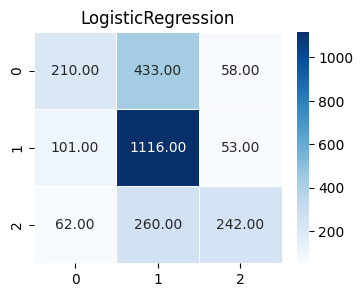

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       701
           1       0.94      0.97      0.96      1270
           2       0.95      0.93      0.94       564

    accuracy                           0.95      2535
   macro avg       0.95      0.94      0.95      2535
weighted avg       0.95      0.95      0.95      2535



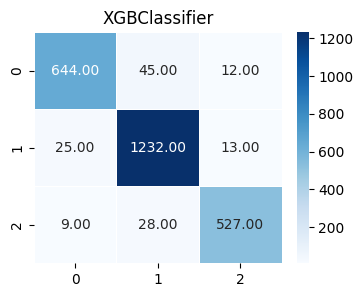

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.72      0.21      0.32       701
           1       0.61      0.95      0.74      1270
           2       0.79      0.51      0.62       564

    accuracy                           0.64      2535
   macro avg       0.71      0.55      0.56      2535
weighted avg       0.68      0.64      0.60      2535



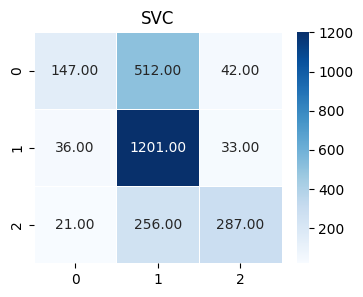

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       701
           1       0.68      0.94      0.79      1270
           2       0.86      0.27      0.41       564

    accuracy                           0.70      2535
   macro avg       0.75      0.61      0.62      2535
weighted avg       0.73      0.70      0.67      2535



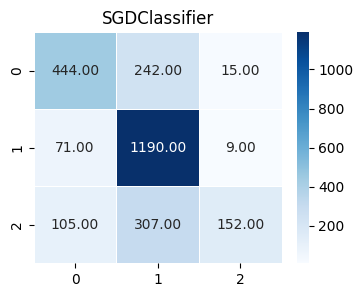

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       701
           1       0.74      0.91      0.81      1270
           2       0.87      0.73      0.79       564

    accuracy                           0.77      2535
   macro avg       0.79      0.72      0.74      2535
weighted avg       0.77      0.77      0.76      2535



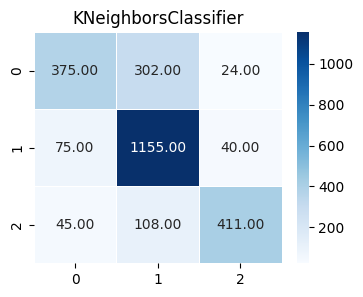

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       701
           1       0.83      0.82      0.83      1270
           2       0.71      0.73      0.72       564

    accuracy                           0.78      2535
   macro avg       0.76      0.77      0.76      2535
weighted avg       0.78      0.78      0.78      2535



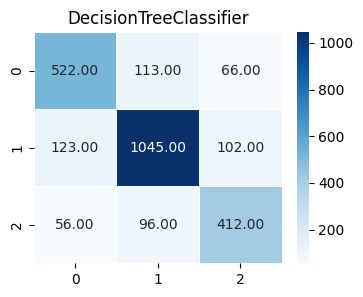

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       701
           1       0.86      0.92      0.89      1270
           2       0.91      0.81      0.86       564

    accuracy                           0.86      2535
   macro avg       0.87      0.84      0.85      2535
weighted avg       0.86      0.86      0.86      2535



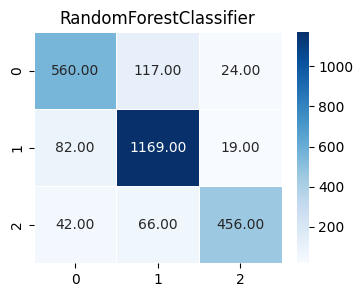

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       701
           1       0.83      0.86      0.84      1270
           2       0.80      0.78      0.79       564

    accuracy                           0.81      2535
   macro avg       0.80      0.79      0.80      2535
weighted avg       0.81      0.81      0.81      2535



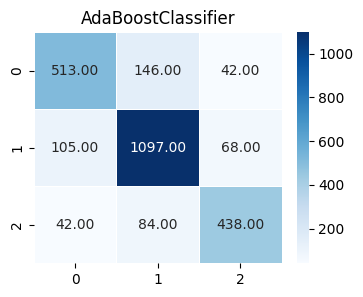

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       701
           1       0.89      0.95      0.92      1270
           2       0.92      0.85      0.88       564

    accuracy                           0.90      2535
   macro avg       0.90      0.88      0.89      2535
weighted avg       0.90      0.90      0.90      2535



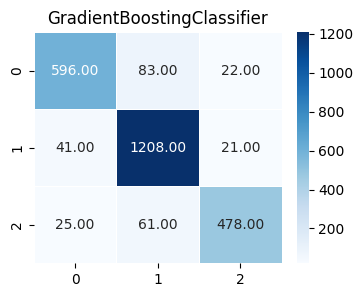

In [530]:
classification_f1_scores = []
classification_accuracy_scores = []
classification_models = []
dfr = perform_classification(x_train,x_test,y_train,y_test)

Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.80      0.05      0.09       701
           1       0.54      0.97      0.69      1270
           2       0.62      0.22      0.32       564

    accuracy                           0.55      2535
   macro avg       0.65      0.41      0.37      2535
weighted avg       0.63      0.55      0.44      2535



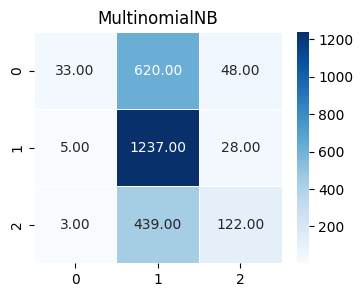

In [531]:
#fit_predict_classification(LogisticRegression(),x_train,x_test,y_train,y_test)4
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = MultinomialNB()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

accuracy_scores = accuracy_score(y_test, y_pred)

# Additional: Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report for {model.__class__.__name__}:\n{class_report}")

classification_accuracy_scores.append(accuracy_scores)
classification_models.append(str(model))
model_class_name = model.__class__.__name__

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title(f"{model_class_name}")
plt.show()

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.56      0.30      0.39       701
           1       0.62      0.88      0.72      1270
           2       0.69      0.43      0.53       564

    accuracy                           0.62      2535
   macro avg       0.62      0.54      0.55      2535
weighted avg       0.62      0.62      0.59      2535



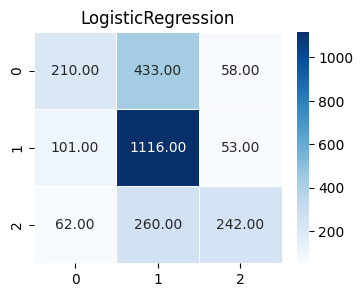

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       701
           1       0.94      0.97      0.96      1270
           2       0.95      0.93      0.94       564

    accuracy                           0.95      2535
   macro avg       0.95      0.94      0.95      2535
weighted avg       0.95      0.95      0.95      2535



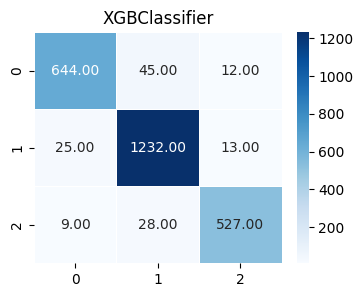

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.72      0.21      0.32       701
           1       0.61      0.95      0.74      1270
           2       0.79      0.51      0.62       564

    accuracy                           0.64      2535
   macro avg       0.71      0.55      0.56      2535
weighted avg       0.68      0.64      0.60      2535



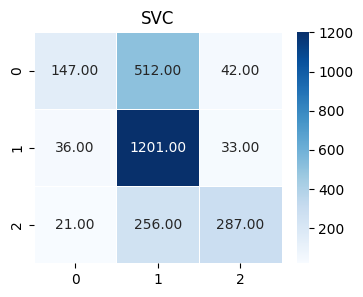

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.89      0.22      0.35       701
           1       0.66      0.94      0.77      1270
           2       0.63      0.62      0.62       564

    accuracy                           0.67      2535
   macro avg       0.73      0.59      0.58      2535
weighted avg       0.72      0.67      0.62      2535



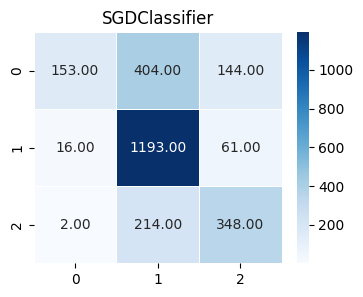

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       701
           1       0.74      0.91      0.81      1270
           2       0.87      0.73      0.79       564

    accuracy                           0.77      2535
   macro avg       0.79      0.72      0.74      2535
weighted avg       0.77      0.77      0.76      2535



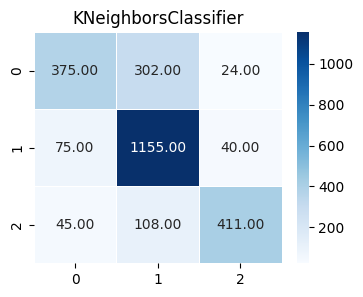

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       701
           1       0.82      0.82      0.82      1270
           2       0.71      0.71      0.71       564

    accuracy                           0.77      2535
   macro avg       0.75      0.76      0.75      2535
weighted avg       0.77      0.77      0.77      2535



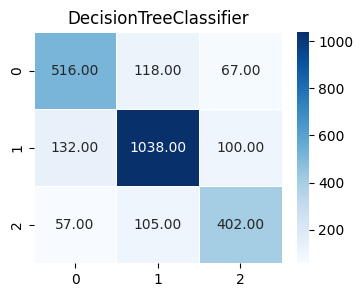

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       701
           1       0.87      0.92      0.90      1270
           2       0.92      0.83      0.87       564

    accuracy                           0.88      2535
   macro avg       0.88      0.86      0.87      2535
weighted avg       0.88      0.88      0.88      2535



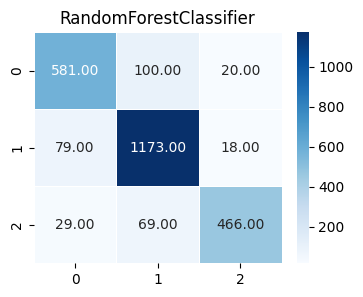

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       701
           1       0.83      0.86      0.84      1270
           2       0.80      0.78      0.79       564

    accuracy                           0.81      2535
   macro avg       0.80      0.79      0.80      2535
weighted avg       0.81      0.81      0.81      2535



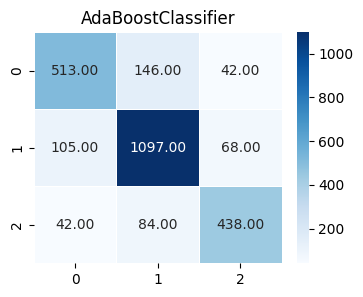

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       701
           1       0.89      0.95      0.92      1270
           2       0.92      0.85      0.88       564

    accuracy                           0.90      2535
   macro avg       0.90      0.88      0.89      2535
weighted avg       0.90      0.90      0.90      2535



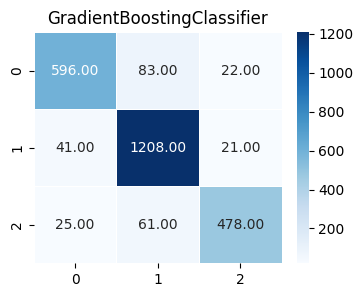

LogisticRegression() - Accuracy: 0.6185404339250493
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) - Accuracy: 0.9479289940828403
SVC() - Accuracy: 0.6449704142011834
SGDClassifier(max_iter=100) - Accuracy: 0.6682445759368836
KNeighborsClassifier(n_neighbors=9) - Accuracy: 0.76568

In [532]:
def fit_predict_classification(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy_scores = accuracy_score(y_test, y_pred)

    # Additional: Calculate and print the classification report
    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model.__class__.__name__}:\n{class_report}")

    model_class_name = model.__class__.__name__

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
    plt.title(f"{model_class_name}")
    plt.show()

    return accuracy_scores, str(model)

def perform_classification(x_train, x_test, y_train, y_test):
    results = []

    results.append(fit_predict_classification(LogisticRegression(), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(XGBClassifier(tree_method="hist", enable_categorical=True), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(SVC(), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(SGDClassifier(loss="hinge", penalty="l2", max_iter=100), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(KNeighborsClassifier(n_neighbors=9), x_train, x_test, y_train, y_test))
    # Uncomment the line below once the issue with MultinomialNB is resolved
    # results.append(fit_predict_classification(MultinomialNB(), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(DecisionTreeClassifier(max_depth=20), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(RandomForestClassifier(n_estimators=10), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(AdaBoostClassifier(n_estimators=100), x_train, x_test, y_train, y_test))
    results.append(fit_predict_classification(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

    return results

# Assuming x_train, x_test, y_train, y_test are already defined
classification_results = perform_classification(x_train, x_test, y_train, y_test)

# Print or visualize the results
for result in classification_results:
    accuracy, model_name = result
    print(f"{model_name} - Accuracy: {accuracy}")


In [533]:
model_names

['LogisticRegression()',
 'XGBClassifier',
 'SVC()',
 'SGDClassifier(max_iter=100)',
 'KNeighborsClassifier(n_neighbors=9)',
 'DecisionTreeClassifier(max_depth=20)',
 'RandomForestClassifier(n_estimators=10)',
 'AdaBoostClassifier(n_estimators=100)',
 'GradientBoostingClassifier()']

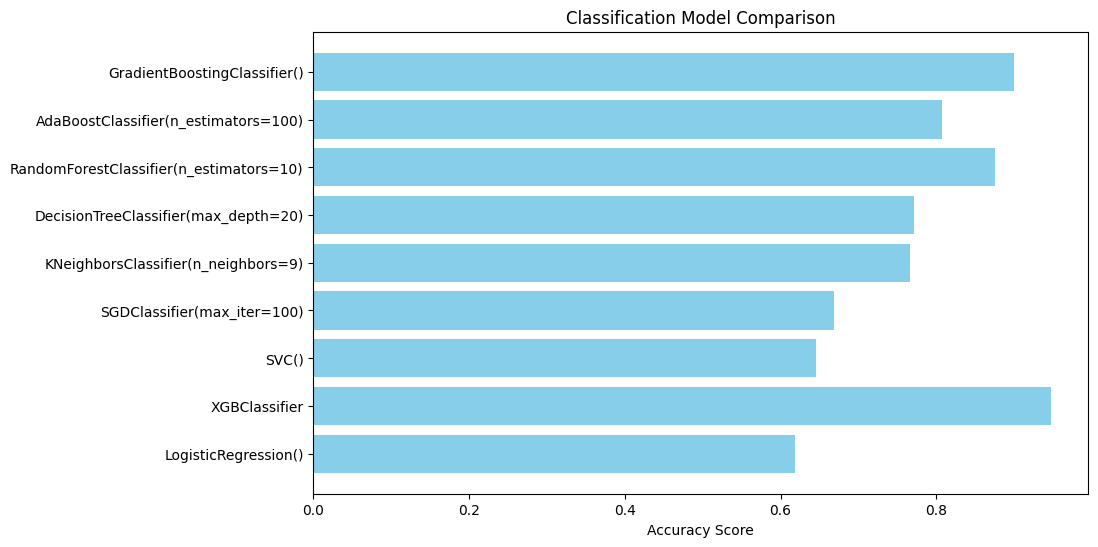

In [534]:
#model_names[1] =
# Optionally, plot a bar chart of accuracy scores
import matplotlib.pyplot as plt

model_names = [result[1] for result in classification_results]
accuracy_scores = [result[0] for result in classification_results]
model_names[1] = 'XGBClassifier'
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Classification Model Comparison')
plt.show()

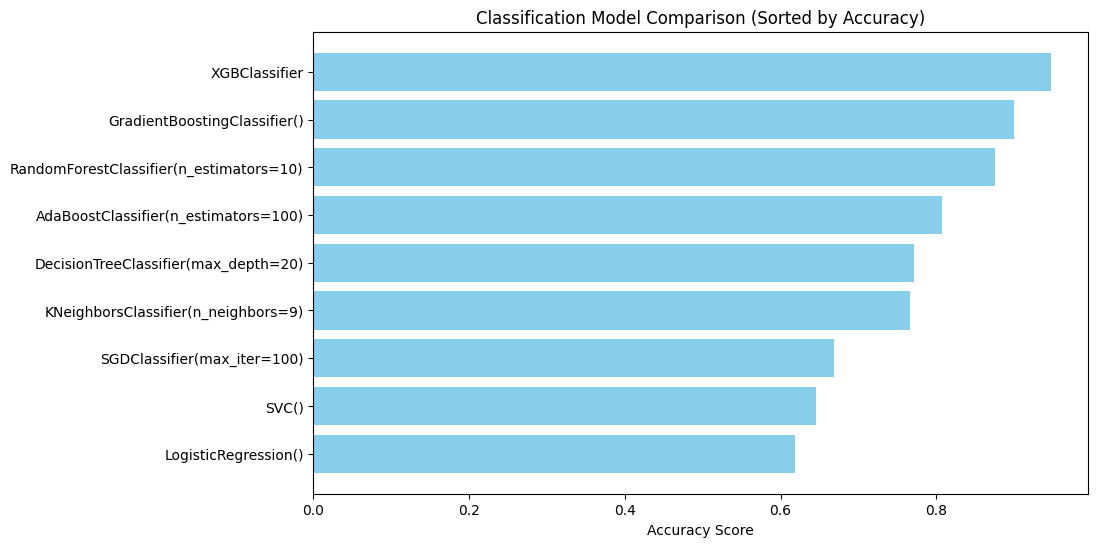

In [535]:
combined_results = list(zip(model_names, accuracy_scores))

# Sort the combined results by accuracy (the second element in each tuple)
sorted_results = sorted(combined_results, key=lambda x: x[1])

# Unpack the sorted results back into separate lists
sorted_model_names, sorted_accuracy_scores = zip(*sorted_results)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_model_names, sorted_accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Classification Model Comparison (Sorted by Accuracy)')
plt.show()

In [488]:
# Fine Tuning the Best Model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameters and their possible value ranges
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2),
}

# Create the XGBoost classifier
model = XGBClassifier(tree_method="hist", enable_categorical=True)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params_rand = random_search.best_params_
best_model_rand = random_search.best_estimator_

# Fit the best model to the training data
best_model_rand.fit(x_train, y_train)

# Predict on the test set
y_pred_tuned_rand = best_model_rand.predict(x_test)

# Calculate accuracy scores
accuracy_scores_tuned_rand = accuracy_score(y_test, y_pred_tuned_rand)

# Print the best hyperparameters
print(f"Best Hyperparameters (Random Search): {best_params_rand}")

# Print the accuracy score after hyperparameter tuning
print(f"Accuracy after Hyperparameter Tuning (Random Search): {accuracy_scores_tuned_rand}")

# Print the classification report
class_report_tuned_rand = classification_report(y_test, y_pred_tuned_rand)
print(f"Classification Report after Hyperparameter Tuning (Random Search):\n{class_report_tuned_rand}")

# Plot the confusion matrix for the tuned model
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned_rand), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title(f"Tuned {model_class_name} (Random Search)")
plt.show()

KeyboardInterrupt: 

Classification Report for :
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       701
           1       0.94      0.97      0.96      1270
           2       0.95      0.93      0.94       564

    accuracy                           0.95      2535
   macro avg       0.95      0.94      0.95      2535
weighted avg       0.95      0.95      0.95      2535



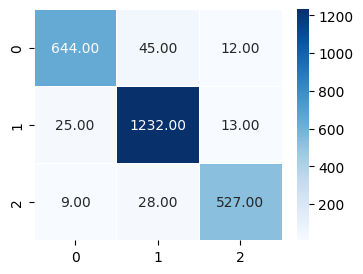

In [537]:
# Best Model
model = XGBClassifier(tree_method="hist", enable_categorical=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_scores = accuracy_score(y_test, y_pred)

# Additional: Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report for :\n{class_report}")

classification_accuracy_scores.append(accuracy_scores)
classification_models.append(str(model))
#model_class_name = model._class.__name_

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
#plt.title(f"{model_class_name}")
plt.show()

file_name = 'XGBoost_best_best.sav'
pickle.dump(model, open(file_name, 'wb'))

In [434]:
file_name = 'XGBoost_best_best.sav'
pickle.dump(best_model_rand, open(file_name, 'wb'))

In [433]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the XGBoost classifier with the best hyperparameters from Random Search
best_model_cv = XGBClassifier(
    tree_method="hist",
    enable_categorical=True,
    n_estimators=best_params_rand['n_estimators'],
    max_depth=best_params_rand['max_depth'],
    learning_rate=best_params_rand['learning_rate'],
    subsample=best_params_rand['subsample'],
    colsample_bytree=best_params_rand['colsample_bytree']
)

# Specify the number of folds for cross-validation
num_folds = 5  # You can adjust this based on your preference

# Create a Stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(best_model_cv, x_train, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation: {cv_scores.std()}')

Cross-Validation Scores: [0.90335306 0.90384615 0.9117357  0.89891519 0.90873212]
Mean Accuracy: 0.9053164430095096
Standard Deviation: 0.0044691474687170345


In [436]:
best_model = pickle.load(open('XGBoost_finetuned.sav','rb'))

In [228]:
# Real Time PRediction
def mfcc_features(signal, sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=20).T, axis=0).tolist()

# Load audio file
signal, sample_rate = librosa.load('/content/drive/MyDrive/Techolution/Trigger Words/door_close/62d704b0449ba8ac5df3de46.wav',sr = None)  # Door Open

# Extract MFCC features and append to lists
mfcc = mfcc_features(signal, sample_rate)
mfcc = np.array(mfcc)
print(mfcc.shape)
mfcc_reshaped = mfcc.reshape(1, -1)

# Predict using the reshaped mfcc
y_pred = model.predict(mfcc_reshaped)

# Map predicted labels back to original class labels
predicted_class = le.inverse_transform(y_pred)
print("Predicted Class:",y_pred, predicted_class[0])

(20,)
Predicted Class: [0] door_close


In [438]:
# Real-Time Prediction
def mfcc_features(signal, sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T, axis=0).tolist()

# Load audio file
signal, sample_rate = librosa.load('/content/drive/MyDrive/Techolution/Trigger Words/door_close/62d704b0449ba8ac5df3de46.wav', sr=None)  # Door Open

# Extract MFCC features and reshape
mfcc = mfcc_features(signal, sample_rate)
mfcc = np.array(mfcc)
print(mfcc.shape)
mfcc_reshaped = mfcc.reshape(1, -1)

# Predict using the loaded model (best_model)
y_pred = best_model.predict(mfcc_reshaped)

# Map predicted labels back to original class labels if you have the label encoder (le) available
# Replace le with your label encoder if you have one
predicted_class = le.inverse_transform(y_pred)
print("Predicted Class:", y_pred, predicted_class[0])

(40,)
Predicted Class: [0] door_close


Noisy Samples Testing

In [229]:
!pip install noisereduce -q

In [231]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("/content/testing_new1.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

In [297]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("/content/testing_data9.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)


# Real Time PRediction
def mfcc_features(signal, sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=20).T, axis=0).tolist()

# Load audio file
signal, sample_rate = librosa.load('/content/mywav_reduced_noise.wav',sr = None)  # Door Open

# Extract MFCC features and append to lists
mfcc = mfcc_features(signal, sample_rate)
mfcc = np.array(mfcc)
print(mfcc.shape)
mfcc_reshaped = mfcc.reshape(1, -1)

# Predict using the reshaped mfcc
y_pred = model.predict(mfcc_reshaped)

# Map predicted labels back to original class labels
predicted_class = le.inverse_transform(y_pred)
print("Predicted Class:",y_pred, predicted_class[0])

(20,)
Predicted Class: [2] door_stop


In [298]:
def mfcc_features(signal, sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=20).T, axis=0).tolist()

# Load audio file
signal, sample_rate = librosa.load('/content/testing_data9.wav',sr = None)  # Door Open

# Extract MFCC features and append to lists
mfcc = mfcc_features(signal, sample_rate)
mfcc = np.array(mfcc)
print(mfcc.shape)
mfcc_reshaped = mfcc.reshape(1, -1)

# Predict using the reshaped mfcc
y_pred = model.predict(mfcc_reshaped)

# Map predicted labels back to original class labels
predicted_class = le.inverse_transform(y_pred)
print("Predicted Class:",y_pred, predicted_class[0])

(20,)
Predicted Class: [1] door_open


In [255]:
df.to_csv('final.csv')

In [299]:
import pickle

# Assuming 'model' is your trained XGBoost model
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [330]:
reduced_noise

array([18,  9, 16, ...,  2,  2,  2], dtype=int16)